In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


In [118]:
df_per_game = pd.read_csv('per_game.csv') 
df_team_rating = pd.read_csv('team_rating.csv')
df_advanced = pd.read_csv('advanced.csv')

In [119]:
df_okc_per_game = df_per_game[df_per_game['Team'] == 'OKC']
df_okc_per_game_sorted = df_okc_per_game.sort_values(by='GS', ascending=False)
df_okc_starters = df_okc_per_game_sorted.head(5)

defensive_data = pd.DataFrame({
    'Player': df_okc_per_game['Player'],
    'DRB': df_okc_per_game['DRB'],
    'STL': df_okc_per_game['STL'],
    'BLK': df_okc_per_game['BLK']
})

print(defensive_data)

                      Player  DRB  STL  BLK
65           Branden Carlson  1.0  0.2  0.2
70               Alex Caruso  2.3  1.9  0.6
109            Ousmane Dieng  2.0  0.6  0.2
114            Luguentz Dort  3.1  1.2  0.8
120               Alex Ducas  0.0  0.0  0.0
137             Adam Flagler  0.4  0.2  0.0
151  Shai Gilgeous-Alexander  4.7  2.0  1.1
176       Isaiah Hartenstein  9.9  0.9  1.1
189            Chet Holmgren  7.1  0.8  2.6
220               Isaiah Joe  2.2  0.7  0.2
231             Dillon Jones  1.2  0.2  0.0
263             Malevy Leons  0.3  0.0  0.0
313            Ajay Mitchell  1.5  0.8  0.1
380               Alex Reese  0.0  0.0  0.0
470            Cason Wallace  2.3  1.7  0.8
487            Aaron Wiggins  2.3  0.9  0.3
493           Jalen Williams  4.9  1.7  0.7
494          Jaylin Williams  1.3  0.3  0.3
496         Kenrich Williams  2.4  0.7  0.2


PTS PREDICTION

In [120]:
data_offense = pd.DataFrame({
    'Player': df_per_game['Player'],
    'FGA' : df_per_game['FGA'],
    'FTA' : df_per_game['FTA'],
    '3PA' : df_per_game['3PA'],
    'PTS' : df_per_game['PTS']
})

X = data_offense[['FGA', 'FTA', '3PA']]
y = data_offense['PTS']
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(model.coef_)
print(model.intercept_)

# Predict points on the test set
y_pred = model.predict(X_test)

# Show predictions
print("Predicted Points:", y_pred)
print("Actual Points:", y_test.values)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

[ 1.09229729  0.81302611 -0.00396175]
-0.2025795676254365
Predicted Points: [26.24680459  8.50855381  6.00489479 18.46726367  7.80177021  3.85367207
  6.71354696  0.91318523  1.97805327 12.81533596 17.55668118  1.78385366
  6.41695429 17.28138235  1.76355556  0.88575598 10.83386021  6.38713739
 11.63917682 12.06598588  6.5750999   5.0269775   3.49884812 12.13402194
  2.30653481 11.04430508  1.35010414  4.83357024  7.39229114  7.88426135
 11.86733726 12.5733179   0.780488    9.13848381  1.76157469  9.30602531
  5.00132573  8.84178944  7.06558709 15.64066105  7.04390768  0.69303937
  0.56084001  1.37723891  1.97805327  6.60847177 23.68292281  1.9792418
 18.27513603  9.41002428  1.21621839 13.28276243 20.19510939  1.02281113
  2.24978653 21.96991983  2.35792943 14.30762323  3.4489365  10.63848268
  0.88575598 17.11935548  1.86713715  3.3909086   8.48715827  1.15540667
  5.84742924 31.81045953 13.33871836 15.08005523  1.81217696  9.66788933
  5.48557583  7.42765449 26.82046298  2.52211935 

C:\Users\User\AppData\Local\Temp\ipykernel_124004\2899770900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


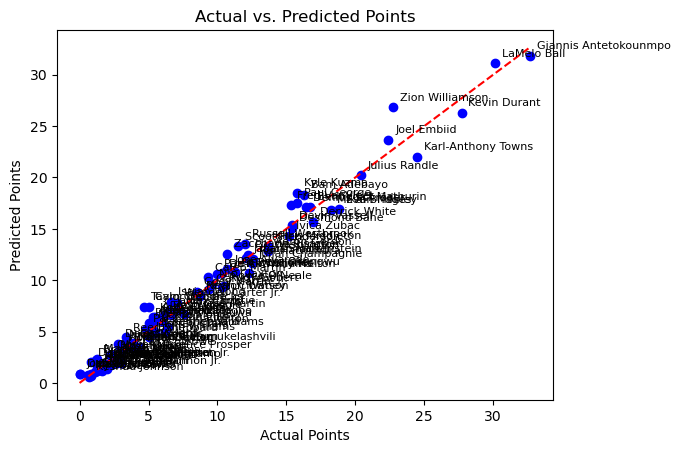

In [121]:
players_test = data_offense['Player'].loc[y_test.index]

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add player names as annotations
for i, player in enumerate(players_test):
    plt.annotate(player, (y_test.iloc[i], y_pred[i]), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=8)
    
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points')
plt.show()

Predicting Team success

In [122]:

# Create the dataframe with correct column names
data_team_stats = pd.DataFrame({
    'Team' : df_team_rating['Team'],
    'ORtg' : df_team_rating['ORtg'],
    'DRtg' : df_team_rating['DRtg'],
    'W/L%' : df_team_rating['W/L%']
})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_team_stats[[ 'ORtg', 'DRtg']])
y = data_team_stats['W/L%']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:" , model.intercept_)

# Predict points on the test set
y_pred = model.predict(X_test)

# Show predictions
print("Predicted Win rate:", y_pred)
print("Actual Win rate:", y_test.values)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)


Coefficients: [ 0.1076795  -0.10726977]
Intercept: 0.49279010986241334
Predicted Win rate: [0.2642767  0.47303263 0.35793813 0.44855256 0.56063143 0.55627184]
Actual Win rate: [0.355 0.5   0.375 0.484 0.588 0.533]
Mean Squared Error (MSE): 0.001966033627922195
R-squared (R^2): 0.713694846849431


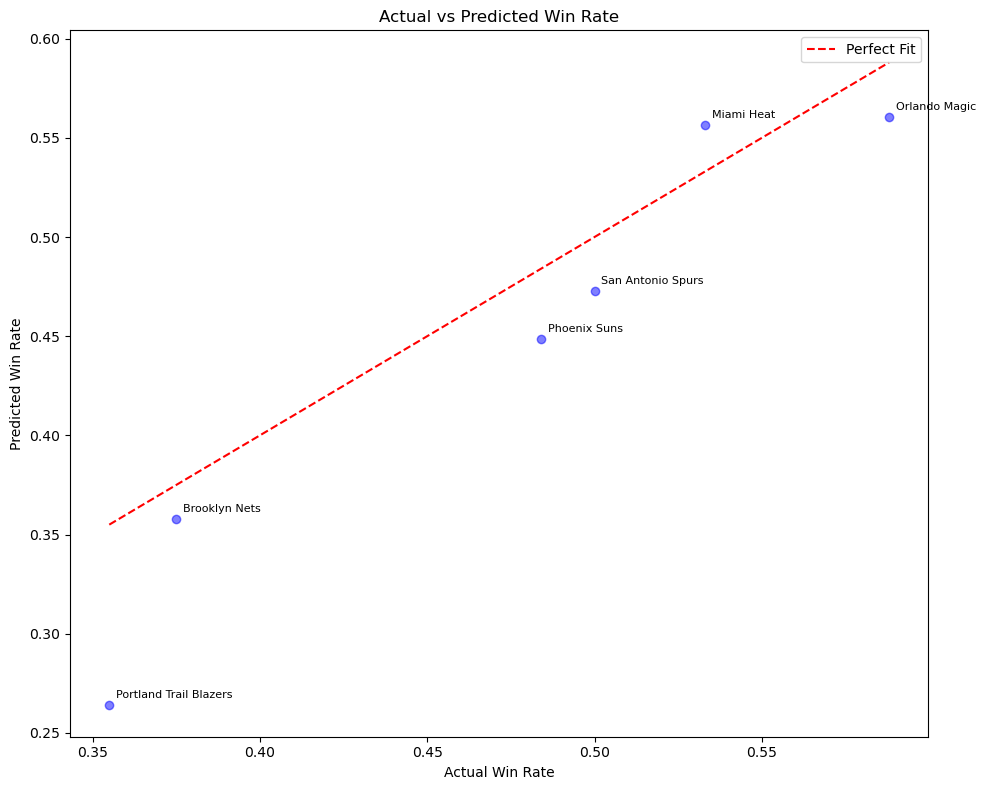

In [123]:
players_test = data_team_stats['Team'].loc[y_test.index]

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', label='Perfect Fit')

# Add player names as annotations
for i, player in enumerate(players_test):
    plt.annotate(player, (y_test.iloc[i], y_pred[i]), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=8)

plt.xlabel('Actual Win Rate')
plt.ylabel('Predicted Win Rate')
plt.title('Actual vs Predicted Win Rate')
plt.legend()
plt.tight_layout()
plt.show()


In [124]:

# Create the dataframe with correct column names
data_impact_stats = pd.DataFrame({
    'Player': df_per_game['Player'],
    'PTS' : df_per_game['PTS'],
    'AST' : df_per_game['AST'],
    'TRB' : df_per_game['TRB'],
    'STL' : df_per_game['STL'],
    'BLK' : df_per_game['BLK'],
    'MP' : df_per_game['MP'],
    'USG%' : df_advanced['USG%']
})


X = data_impact_stats[['USG%', 'MP']]
y = data_impact_stats['PTS'] + data_impact_stats['AST'] + data_impact_stats['TRB'] + data_impact_stats['STL'] + data_impact_stats['BLK']

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.dropna()
y_train = y_train.dropna()

model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:" , model.intercept_)

# Predict points on the test set
y_pred = model.predict(X_test)

# Show predictions
print("Predicted Impact:", y_pred)
print("Actual Impact:", y_test.values)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)


Coefficients: [0.02165695 0.96420262]
Intercept: -3.2952659228212635
Predicted Impact: [11.09489476  0.20062848  9.8914297  -0.11895203 13.24335224 15.96807193
 31.16245487 13.20860744 29.78319379 14.71997591 30.46237333 10.44612863
 21.28399315 16.03953985 11.03218329 10.01157892 -1.07232618 14.73522946
 20.71206235 21.48888553 29.12002274 24.37499632 22.10535361 13.15889015
 31.66178806  5.97821745 14.3159333  -0.99652686 20.07073563  2.50586463
 16.33200234 15.87805506 33.00734034 21.78247771 -0.10388585 15.79679466
 28.64018081 21.2992467  24.87988427 18.00692761 27.27739666 20.87891454
 24.73581872  8.96837528 10.15460846  0.38697192 18.14016468 18.34920108
 14.37431337 16.68529165 13.24335224 27.21459151  8.38533494  5.18849379
 26.94378597 16.20206065 30.8383556   4.69113893 11.61287056  0.48772358
  3.15604151  6.808147   10.9583623  21.79537819  4.62174301 25.85058398
  1.00974971 11.8804744   1.67612246 15.80771682 31.24880161 13.20653543
 24.37386663  6.32369262 -0.06047827 

C:\Users\User\AppData\Local\Temp\ipykernel_124004\50893615.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


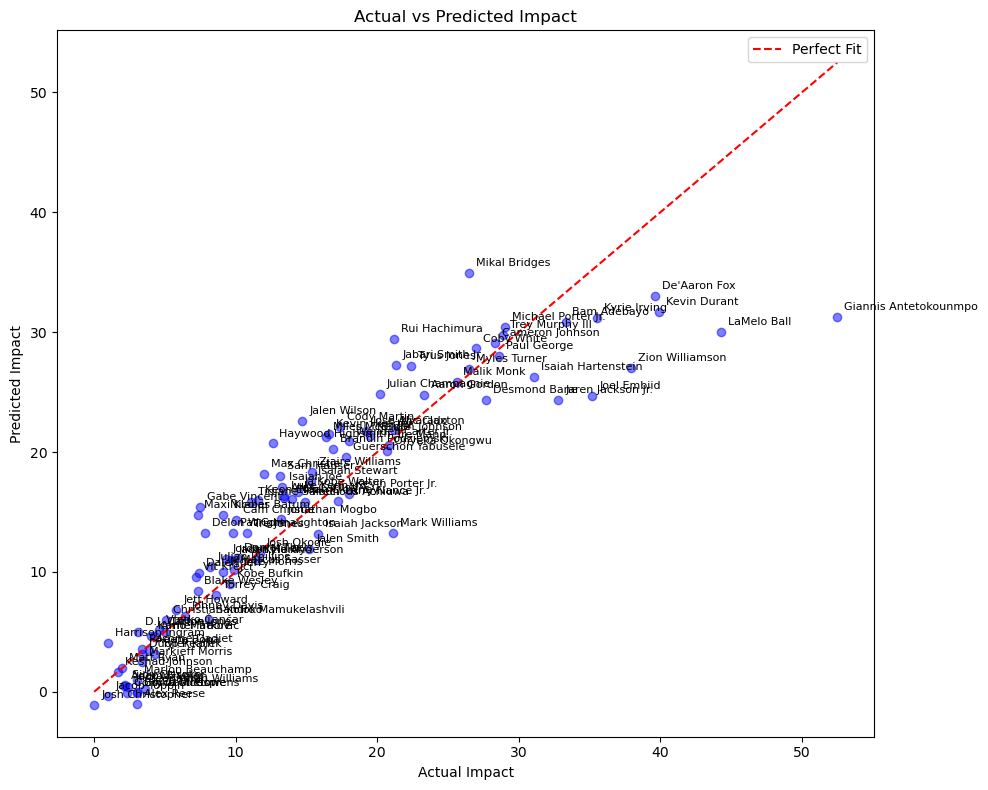

In [125]:
# First get player names that correspond to test set
players_test = data_impact_stats['Player'].loc[y_test.index]

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='red', linestyle='--', label='Perfect Fit')

# Add player names as annotations
for i, player in enumerate(players_test):
    plt.annotate(player, (y_test.iloc[i], y_pred[i]), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=8)

plt.xlabel('Actual Impact')
plt.ylabel('Predicted Impact')
plt.title('Actual vs Predicted Impact')
plt.legend()
plt.tight_layout()
plt.show()